In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# --- 1. Data Loading and Initial Exploration ---

# Load the dataset
# Make sure to upload 'PCOS dataset 5.csv' to your Google Colab environment
df = pd.read_csv('PCOS dataset 5.csv')

print("--- Initial Data Exploration ---")
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nGeneral information about the dataset:")
print(df.info())

print("\nDescriptive statistics of the dataset:")
print(df.describe())


--- Initial Data Exploration ---

First 5 rows of the dataset:
   Age (in Years)  Weight (in Kg)  Height (in Cm / Feet)  \
0              21            47.0                  168.0   
1              21            45.0                  156.0   
2              17            37.0                  162.0   
3              28            54.0                  160.0   
4              45            40.0                  150.0   

   Can you tell us your blood group ?  \
0                                  13   
1                                  11   
2                                  15   
3                                  15   
4                                  13   

   After how many months do you get your periods?\n(select 1- if every month/regular)  \
0                                                  1                                    
1                                                  1                                    
2                                                  1          

In [3]:
# --- 2. Data Preprocessing: Clean Column Names ---

# Clean column names for easier access and readability
new_columns = {
    'Age (in Years)': 'Age_Years',
    'Weight (in Kg)': 'Weight_Kg',
    'Height (in Cm / Feet)': 'Height_Cm_Feet',
    'Can you tell us your blood group ?': 'Blood_Group',
    'After how many months do you get your periods?\n(select 1- if every month/regular)': 'Period_Cycle_Months',
    'Have you gained weight recently?': 'Weight_Gain',
    'Do you have excessive body/facial hair growth ?': 'Hair_Growth',
    'Are you noticing skin darkening recently?': 'Skin_Darkening',
    'Do have hair loss/hair thinning/baldness ?': 'Hair_Loss',
    'Do you have pimples/acne on your face/jawline ?': 'Pimples_Acne',
    'Do you eat fast food regularly ?': 'Fast_Food',
    'Do you exercise on a regular basis ?': 'Exercise',
    'Have you been diagnosed with PCOS/PCOD?': 'PCOS_Diagnosis',
    'Do you experience mood swings ?': 'Mood_Swings',
    'Are your periods regular ?': 'Periods_Regular',
    'How long does your period last ? (in Days)\nexample- 1,2,3,4.....': 'Period_Duration_Days'
}
df = df.rename(columns=new_columns)

print("\n--- Cleaned Column Names ---")
print(df.columns.tolist())


--- Cleaned Column Names ---
['Age_Years', 'Weight_Kg', 'Height_Cm_Feet', 'Blood_Group', 'Period_Cycle_Months', 'Weight_Gain', 'Hair_Growth', 'Skin_Darkening', 'Hair_Loss', 'Pimples_Acne', 'Fast_Food', 'Exercise', 'PCOS_Diagnosis', 'Mood_Swings', 'Periods_Regular', 'Period_Duration_Days']



--- Exploratory Data Analysis ---


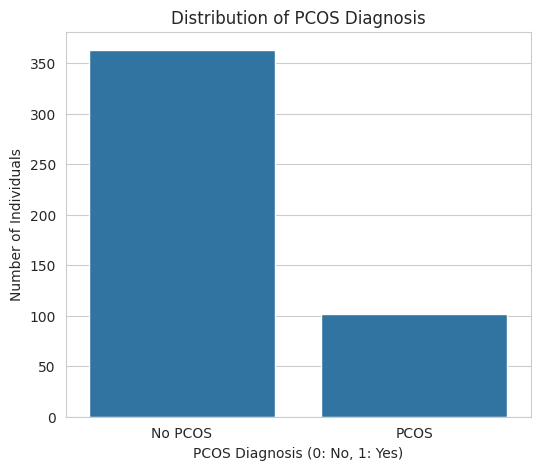

In [4]:
# --- 3. Exploratory Data Analysis (EDA) ---

print("\n--- Exploratory Data Analysis ---")
# Set a style for the plots
sns.set_style("whitegrid")

# 3.1. Distribution of PCOS_Diagnosis
plt.figure(figsize=(6, 5))
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis (0: No, 1: Yes)')
plt.ylabel('Number of Individuals')
plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
plt.show()

This graph highlights that the dataset has a class imbalance. There are more individuals without a PCOS diagnosis than those with one. This is an important finding for the report, especially when we discuss machine learning model development, as class imbalance can affect model performance (e.g., a model might be very good at predicting the majority class but poor at predicting the minority class). We might need to consider strategies to address this imbalance during our model training (e.g., oversampling the minority class, undersampling the majority class, using appropriate evaluation metrics like precision, recall, and F1-score in addition to accuracy).

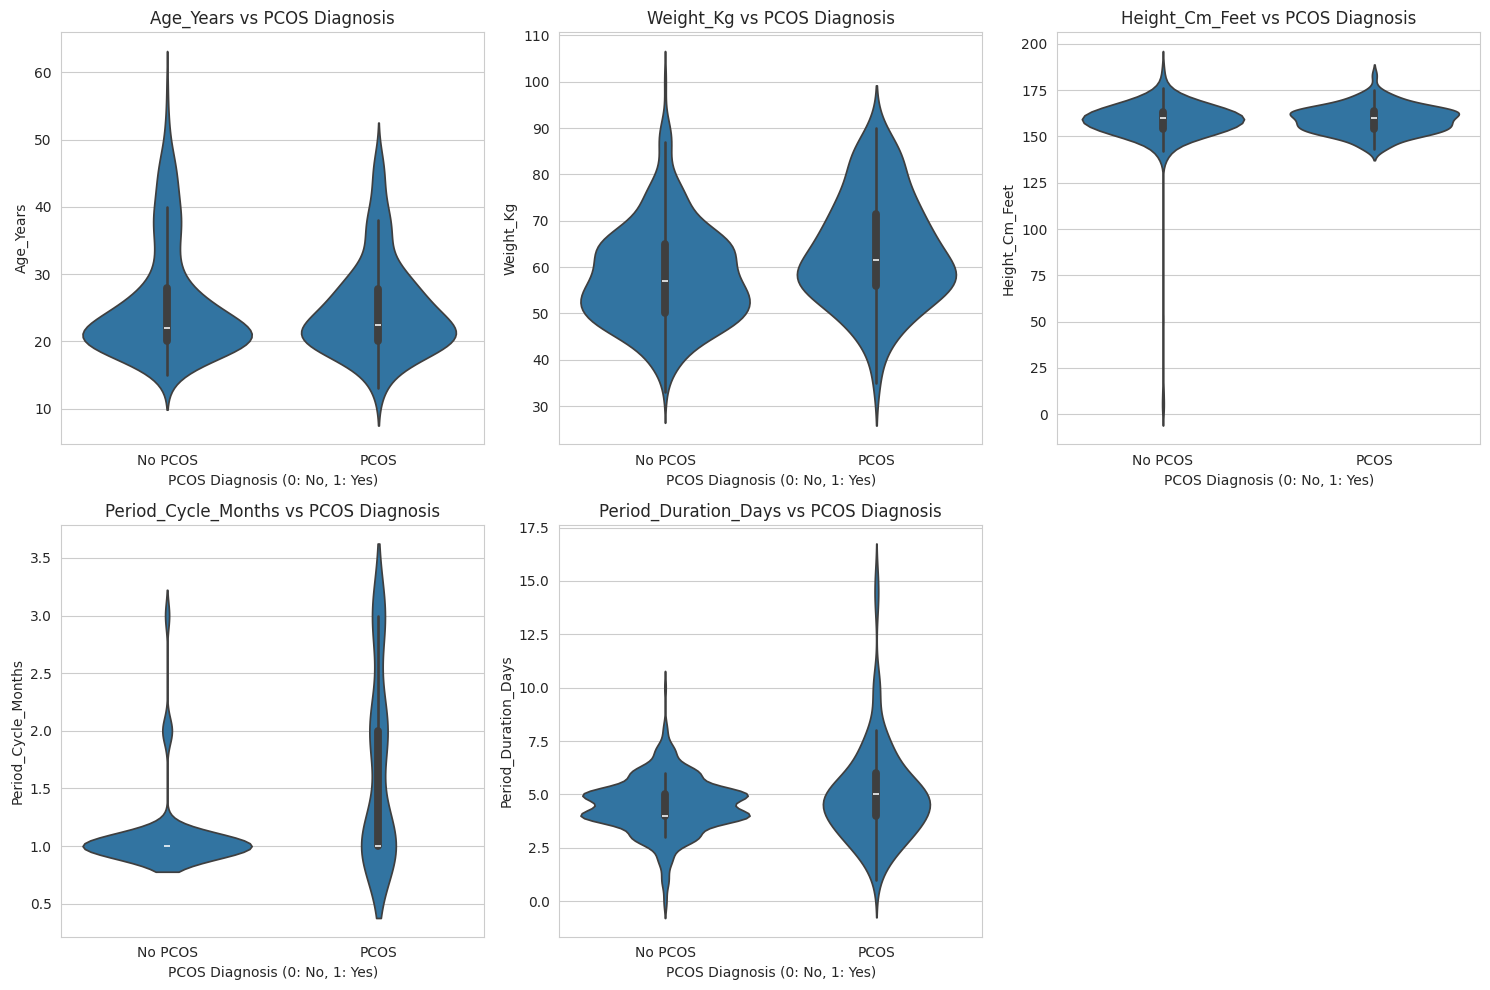

In [5]:
# 3.2. Univariate Analysis of Numerical Features with PCOS_Diagnosis (using violin plots)
numerical_features = ['Age_Years', 'Weight_Kg', 'Height_Cm_Feet', 'Period_Cycle_Months', 'Period_Duration_Days']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x='PCOS_Diagnosis', y=feature, data=df)
    plt.title(f'{feature} vs PCOS Diagnosis')
    plt.xlabel('PCOS Diagnosis (0: No, 1: Yes)')
    plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
plt.tight_layout()
plt.show()

1. Age_Years vs PCOS Diagnosis:

Observation: The violin plots for 'Age_Years' for both 'No PCOS' and 'PCOS' groups show somewhat similar distributions, with a central tendency around the younger adult ages (20s). The 'PCOS' group might appear slightly shifted towards younger ages in terms of the denser part of the distribution, but both groups cover a wide age range.

Interpretation: While PCOS can manifest at various ages, this plot suggests that in this dataset, diagnosis might be more prevalent or recognized in younger individuals, though it affects a broad age spectrum. The age distribution itself might not be a strong differentiating factor on its own, but it's important context.

2. Weight_Kg vs PCOS Diagnosis:

Observation: The 'PCOS' group shows a clear shift towards higher weights compared to the 'No PCOS' group. The violin for 'PCOS' is wider at higher weight values, indicating a greater density of individuals with higher weights, and its median is visibly higher.

Interpretation: This graph strongly suggests a correlation between higher body weight and PCOS diagnosis in the dataset. Weight gain and difficulty losing weight are common symptoms associated with PCOS, and this plot provides visual evidence supporting that relationship.

3. Height_Cm_Feet vs PCOS Diagnosis:

Observation: The violin plots for 'Height_Cm_Feet' are quite similar for both 'No PCOS' and 'PCOS' groups. The distributions largely overlap, and their medians are close.

Interpretation: This indicates that height does not appear to be a significant differentiating factor between individuals with and without PCOS in the dataset. The distribution of height is roughly the same regardless of PCOS diagnosis.

4. Period_Cycle_Months vs PCOS Diagnosis:

Observation: The 'PCOS' group's violin plot is significantly different from the 'No PCOS' group. The 'No PCOS' group is heavily concentrated at the lower end (indicating regular, monthly periods, possibly '1' for every month), while the 'PCOS' group is much wider and extends to higher values, showing a more varied and often longer period cycle. The median for the 'PCOS' group is notably higher.

Interpretation: This is a very strong indicator. It confirms that irregular periods (longer cycles, less frequent periods) are a prominent symptom and a key disparity for individuals with PCOS, as expected. The majority of individuals without PCOS have regular monthly cycles.

5. Period_Duration_Days vs PCOS Diagnosis:

Observation: The 'PCOS' group's violin plot shows a slightly broader and potentially higher range of period durations compared to the 'No PCOS' group. While both distributions largely overlap, there might be a tendency for the 'PCOS' group to have longer duration.

Interpretation: While not as stark as 'Period_Cycle_Months', this plot suggests that period duration can also vary for individuals with PCOS, possibly tending towards longer durations for some, reflecting the hormonal imbalances associated with the condition.



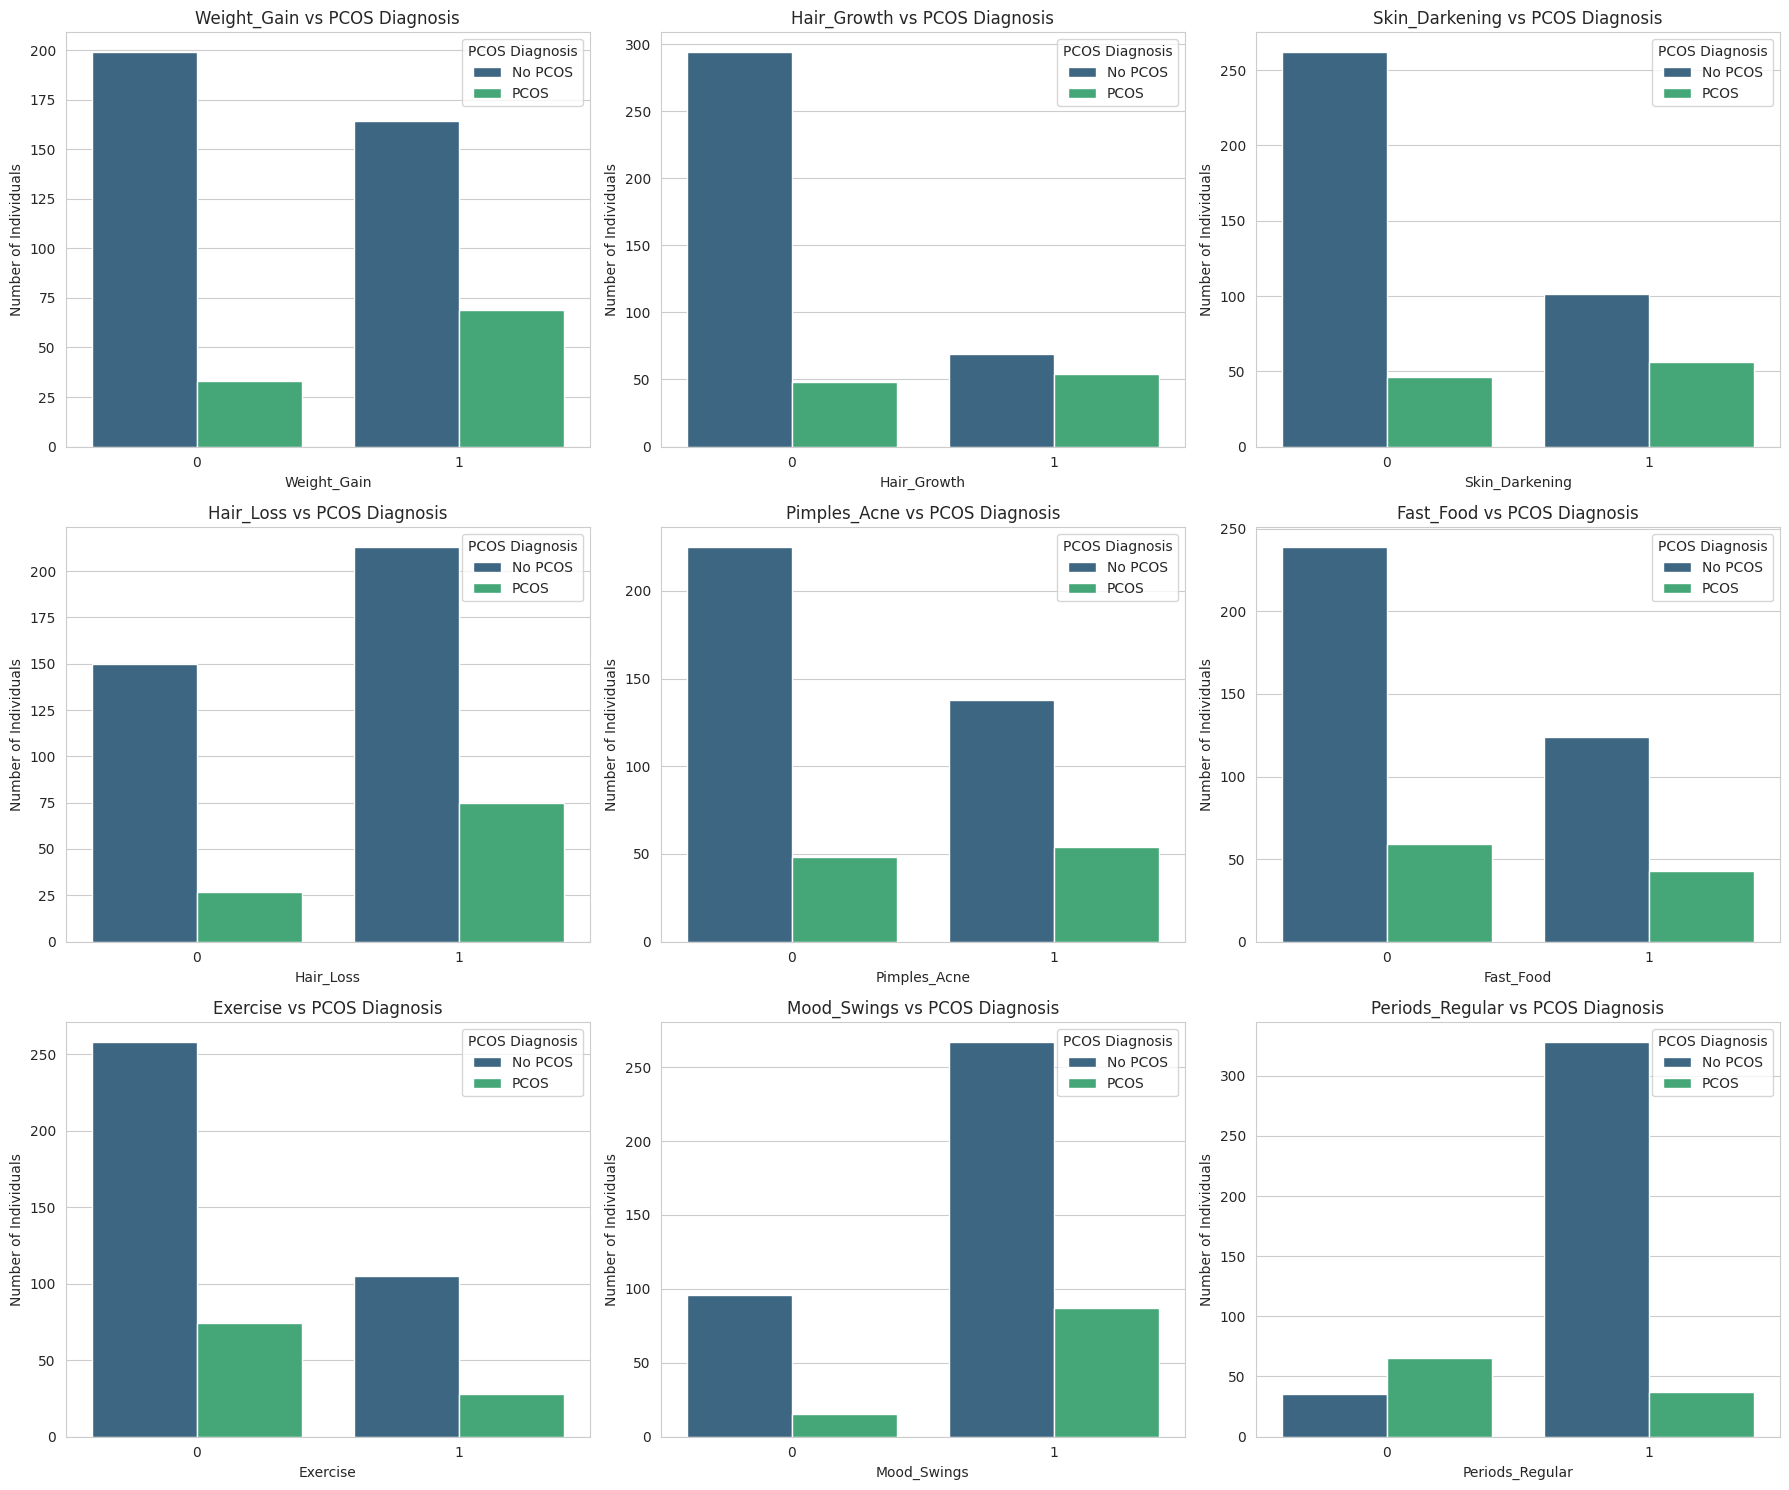

In [6]:
# 3.3. Bivariate Analysis of Key Categorical Features with PCOS_Diagnosis (using count plots)
categorical_features = ['Weight_Gain', 'Hair_Growth', 'Skin_Darkening', 'Hair_Loss', 'Pimples_Acne', 'Fast_Food', 'Exercise', 'Mood_Swings', 'Periods_Regular']

plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, hue='PCOS_Diagnosis', data=df, palette='viridis')
    plt.title(f'{feature} vs PCOS Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Number of Individuals')
    plt.legend(title='PCOS Diagnosis', labels=['No PCOS', 'PCOS'])
plt.tight_layout()
plt.show()

1. Weight_Gain vs PCOS Diagnosis:

Observation: The "Yes" (1) category for Weight_Gain shows a notably higher count of individuals diagnosed with PCOS compared to those without PCOS. Conversely, among those who did not experience Weight_Gain (0), the majority do not have PCOS.

Interpretation: This strongly suggests that recent weight gain is a common and prominent symptom associated with PCOS in this dataset. Individuals experiencing weight gain are more likely to have a PCOS diagnosis.

2. Hair_Growth vs PCOS Diagnosis:

Observation: Similar to Weight_Gain, the "Yes" (1) category for Hair_Growth has a significantly higher proportion of individuals with PCOS compared to those without.

Interpretation: Excessive body/facial hair growth (hirsutism) is a classic symptom of PCOS. This plot clearly indicates a strong association between having excessive hair growth and a PCOS diagnosis.

3. Skin_Darkening vs PCOS Diagnosis:

Observation: Among individuals reporting Skin_Darkening (1), a greater number are diagnosed with PCOS than not. While the overall numbers are lower than for weight gain or hair growth, the trend is clear.

Interpretation: Skin darkening (acanthosis nigricans) is often linked to insulin resistance, which is common in PCOS. This plot shows that skin darkening is more prevalent in the PCOS group, supporting its role as a potential indicator.

4. Hair_Loss vs PCOS Diagnosis:

Observation: The "Yes" (1) category for Hair_Loss shows a higher count of individuals with PCOS compared to those without. The majority of individuals without hair loss also do not have PCOS.

Interpretation: Hair loss or thinning is another common androgen-related symptom of PCOS. This graph indicates that individuals experiencing hair loss are more frequently diagnosed with PCOS.

5. Pimples_Acne vs PCOS Diagnosis:

Observation: The "Yes" (1) category for Pimples_Acne has a higher count of individuals with PCOS, whereas the "No" (0) category is dominated by individuals without PCOS.

Interpretation: Acne is a very common symptom of PCOS due to hormonal imbalances (androgen excess). The plot confirms that pimples/acne on the face/jawline are more prevalent among those diagnosed with PCOS.

6. Fast_Food vs PCOS Diagnosis:

Observation: Both "Yes" (1) and "No" (0) categories for Fast_Food show a higher number of individuals without PCOS. While there are individuals with PCOS who consume fast food, the difference between the two diagnosis groups for fast food consumption is less pronounced compared to other symptoms.

Interpretation: This plot suggests a less direct or weaker correlation between regular fast food consumption and PCOS diagnosis in this dataset. While lifestyle factors are relevant, this specific dietary habit doesn't appear to be as strong a differentiator as the clinical symptoms.

7. Exercise vs PCOS Diagnosis:

Observation: Similar to Fast_Food, the Exercise plot shows that a higher number of individuals without PCOS report exercising regularly (1) and not exercising (0). The differences between PCOS and non-PCOS groups within each exercise category are not as striking as with the direct symptoms.

Interpretation: Regular exercise is generally beneficial for health, including managing PCOS symptoms. However, this plot doesn't show a dramatic difference in exercise habits between the diagnosed and non-diagnosed groups in your dataset, indicating it might not be a primary distinguishing factor for diagnosis alone.

8. Mood_Swings vs PCOS Diagnosis:

Observation: Among individuals experiencing Mood_Swings (1), there's a higher count of those with PCOS compared to those without. The opposite is true for those who do not experience mood swings (0).

Interpretation: Mood swings and emotional disturbances are frequently reported by individuals with PCOS, possibly due to hormonal fluctuations. This plot supports that mood swings are more commonly reported by the PCOS-diagnosed group.

9. Periods_Regular vs PCOS Diagnosis:

Observation: This is a very clear and expected pattern. The "Yes" (1) category for Periods_Regular is overwhelmingly dominated by individuals without PCOS. Conversely, the "No" (0) category (irregular periods) shows a significantly higher count of individuals with PCOS.

Interpretation: This is one of the most critical diagnostic criteria for PCOS. The plot powerfully illustrates that irregular periods are a defining characteristic for individuals diagnosed with PCOS in your dataset, while those without PCOS predominantly have regular periods.



In [7]:
# --- 4. Machine Learning Model Development ---

print("\n--- Machine Learning Model Development ---")

# Separate features (X) and target (y)
X = df.drop('PCOS_Diagnosis', axis=1)
y = df['PCOS_Diagnosis']

# Split the data into training and testing sets
# Using stratify=y to maintain the proportion of PCOS cases in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")



--- Machine Learning Model Development ---
Shape of X_train: (325, 15)
Shape of X_test: (140, 15)
Shape of y_train: (325,)
Shape of y_test: (140,)


In [8]:
# 4.1. Logistic Regression Model
print("\n--- Logistic Regression Model ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression - Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))

print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression Model ---

Logistic Regression - Accuracy Score:
0.8142857142857143

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       109
           1       0.61      0.45      0.52        31

    accuracy                           0.81       140
   macro avg       0.73      0.68      0.70       140
weighted avg       0.80      0.81      0.80       140



The Logistic Regression model achieved an overall accuracy of approximately 81.43%. While this seems high, a deeper look into the classification report reveals important details, particularly due to the class imbalance.

The model performs very well in identifying individuals who do not have PCOS (Class 0), demonstrated by high precision (85%), recall (92%), and F1-score (88%) for this class.

However, the model struggles significantly with correctly identifying individuals who do have PCOS (Class 1). The recall of 45% for Class 1 means that the model misses more than half of the actual PCOS cases. The lower precision (61%) and F1-score (52%) for Class 1 further confirm that the model is less reliable when predicting a positive PCOS diagnosis.

While the overall accuracy is reasonable, the model's ability to detect actual PCOS cases (the minority class) is limited. This is a common challenge with imbalanced datasets.

In [9]:
# 4.2. Random Forest Classifier Model
print("\n--- Random Forest Classifier Model ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier - Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))


--- Random Forest Classifier Model ---

Random Forest Classifier - Accuracy Score:
0.8428571428571429

Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       109
           1       0.70      0.52      0.59        31

    accuracy                           0.84       140
   macro avg       0.78      0.73      0.75       140
weighted avg       0.83      0.84      0.83       140



The Random Forest Classifier achieved a higher overall accuracy of approximately 84.29% compared to the Logistic Regression model.

1. Strengths:

The model performs exceptionally well at identifying individuals who do not have PCOS (Class 0), with very high precision (87%), recall (94%), and F1-score (90%). This means it's very reliable when predicting a negative diagnosis.

It shows a noticeable improvement in predicting individuals who do have PCOS (Class 1) compared to Logistic Regression. Its precision for Class 1 (70%) indicates fewer false positives when it predicts PCOS, and its recall (52%) means it correctly identifies more of the actual PCOS cases than the Logistic Regression model did.

2. Weaknesses:

Despite the improvement, the recall for Class 1 (52%) is still relatively low. This indicates that the model still misses a significant portion of actual PCOS cases (nearly half), leading to false negatives. This is likely influenced by the class imbalance in the dataset.

Random Forest model is generally more robust and performs better than Logistic Regression on this dataset, especially in terms of reducing false positives for the PCOS class.

Overall Conclusion:

The analysis clearly identifies several symptoms and physical characteristics that are strongly associated with PCOS, most notably irregular menstrual cycles, weight gain, and androgen-related symptoms (hair growth, acne, hair loss). These findings align with known clinical indicators of PCOS and provide valuable insights into the disparities present in the dataset.

While the developed machine learning models demonstrate good overall predictive accuracy, they face a common challenge associated with imbalanced datasets: a limited ability to detect the minority class (actual PCOS cases). Despite Random Forest showing an improvement in identifying PCOS cases compared to Logistic Regression, there's still a considerable rate of false negatives.

Implications and Future Directions:

For practical applications, especially in a medical context, the recall for the PCOS class is critical. Missing a diagnosis (false negative) can have significant implications. Future work should focus on:

Addressing Class Imbalance: Employing advanced techniques like oversampling (e.g., SMOTE), undersampling, or using algorithms specifically designed for imbalanced datasets (e.g., Cost-sensitive learning).

Feature Engineering/Selection: Further refining or creating new features from existing data that might better distinguish PCOS cases.

Hyperparameter Tuning: Optimizing model parameters more extensively to improve minority class performance.

Ensemble Methods: Exploring more sophisticated ensemble techniques or stacking models.

This analysis provides a foundational understanding of the PCOS dataset, highlighting key diagnostic patterns and demonstrating the feasibility of machine learning for prediction, while also pointing to areas for further model refinement to enhance the detection of positive PCOS cases.